## Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read CSV file

In [3]:
df = pd.read_csv('data/Training Data.csv')

In [4]:
#top 5 columns
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
#shape of data
df.shape

(252000, 13)

In [6]:
#missing value
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
#duplicated data
df.duplicated().sum()

0

In [8]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [9]:
#unique data
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [10]:
#statistics of data
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Exploring data

In [11]:
print("Categories in 'House_Ownership' variable:     ", end=" ")
print(df['House_Ownership'].unique())

print("Categories in 'Married/Single' variable:     ", end=" ")
print(df['Married/Single'].unique())

print("Categories in 'Car_Ownership' variable:     ", end=" ")
print(df['Car_Ownership'].unique())

print("Categories in 'Profession' variable:     ", end=" ")
print(df['Profession'].unique())

print("Categories in 'CITY' variable:     ", end=" ")
print(df['CITY'].unique())

print("Categories in 'STATE' variable:     ", end=" ")
print(df['STATE'].unique())

Categories in 'House_Ownership' variable:      ['rented' 'norent_noown' 'owned']
Categories in 'Married/Single' variable:      ['single' 'married']
Categories in 'Car_Ownership' variable:      ['no' 'yes']
Categories in 'Profession' variable:      ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 

In [12]:
#define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'{len(numerical_features)} are numerical features such are: {numerical_features}\n')
print(f'{len(categorical_features)} are categorical features such are: {categorical_features}')

7 are numerical features such are: ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

6 are categorical features such are: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


### Visualizing

#### Multivariate analysis using pieplot

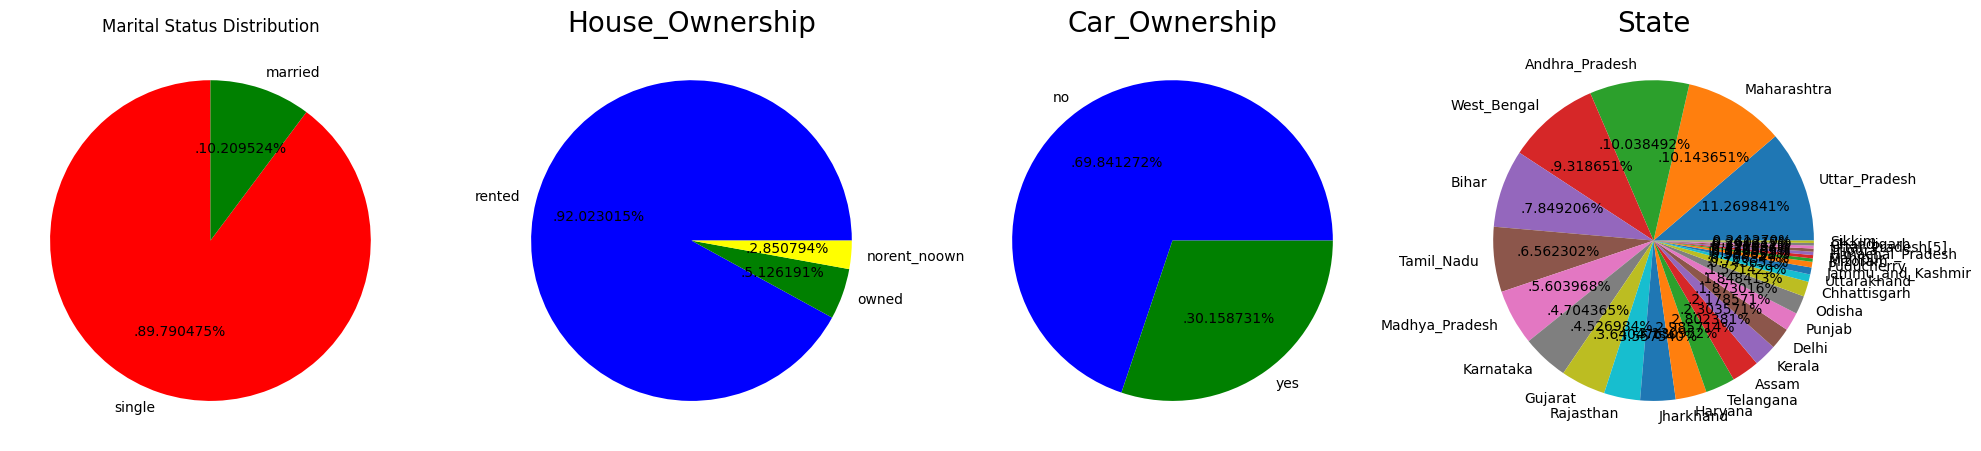

In [13]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Married/Single'].value_counts()
color = ['red','green']


plt.pie(size, labels=size.index, colors=color, autopct='.%2f%%', startangle=90)
# Add a title
plt.title('Marital Status Distribution')
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['House_Ownership'].value_counts()
color = ['blue', 'green', 'yellow']

plt.pie(size, colors = color,labels = size.index ,autopct = '.%2f%%')
plt.title('House_Ownership', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['Car_Ownership'].value_counts()

plt.pie(size, colors = color,labels = size.index ,autopct = '.%2f%%')
plt.title('Car_Ownership', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['STATE'].value_counts()

plt.pie(size, labels=size.index, autopct = '.%2f%%')
plt.title('State', fontsize = 20)
plt.axis('off')

plt.show()

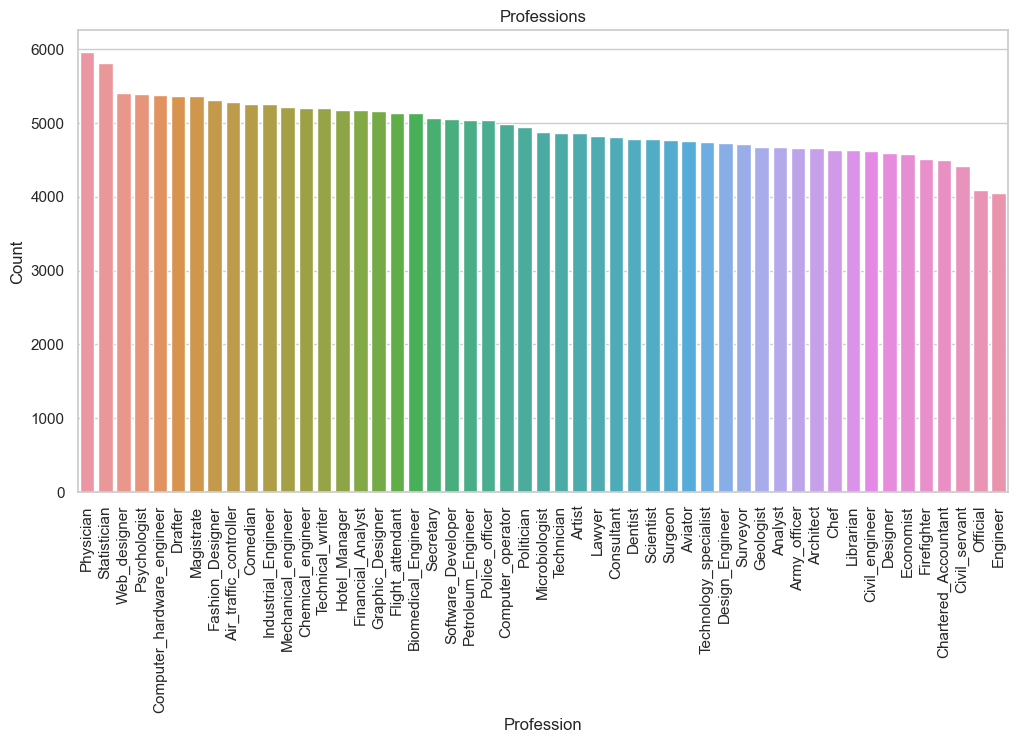

In [14]:
size = df['Profession'].value_counts()
professions = size.index
x = np.arange(len(professions))

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=size.index, y=size.values)
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Professions')
# Rotate x-axis labels for better readability
plt.xticks(x, professions, rotation='vertical')

# Show the plot
plt.show()

In [15]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

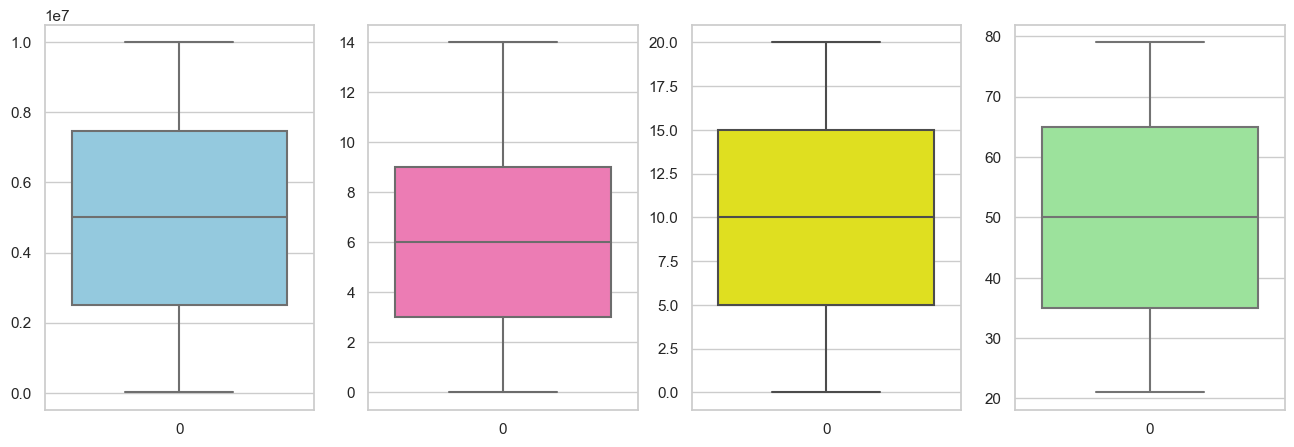

In [16]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Income'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['CURRENT_JOB_YRS'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Experience'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Age'],color='lightgreen')
plt.show()